In [2]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 1

%aimport b6_epilepsies 
import b6_epilepsies as b6 #.py file in the same dir as this .ipynb
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu

# make a custom list of colors
new_colors_order = sns.color_palette(palette='Set2', n_colors=3)
new_colors_order[0], new_colors_order[1], new_colors_order[2] = new_colors_order[1], new_colors_order[0], new_colors_order[2]

order = ['wt','het','hom']


geno_col_dict = dict(zip(order, new_colors_order))

In [4]:
#Middur output NOT FOR Sleep Analysis
# Define input variables
date   = "240827"
box1   = "14"
box2   = "15"
exp    = "ALDH7A1"
# export = False
    
data      = b6.MiddurData(date, box1, box2, exp, export)
middur_df = data.prepare_raw_data()

Finished.


In [36]:
#Middur output for Sleep Analysis
# Define input variables
# date   = "240827"
# box1   = "14"
# box2   = "15"
# exp    = "ALDH7A1"
# export = False

date   = "241006"
box1   = "14"
box2   = "15"
exp    = "PNPO"
export = False

data_SA       = b6.MiddurData_SA(date, box1, box2, exp, export)
middur_df_SA  = data_SA.prepare_raw_data()
geno_table_SA = data_SA.temp_add_genotype() 
merged_df_SA  = data_SA.temp_merge_geno_with_data(middur_df_SA, geno_table_SA)
merged_df_SA.head()



Finished.


,TIME(SECONDS),NA,FISH1,FISH2,FISH3,FISH4,FISH5,FISH6,FISH7,FISH8,...,FISH186,FISH187,FISH188,FISH189,FISH190,FISH191,FISH192,NA,NA,CLOCK
0,start,end,middur,middur,middur,middur,middur,middur,middur,middur,...,middur,middur,middur,middur,middur,middur,middur,,,
1,,,het,het,het,wt,het,unknown,het,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,,,
2,0,60.0,0.0,0.0,0.0,0.08,8.694,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,2.368056
3,60,120.0,0.0,0.0,0.0,0.159,8.236,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,2.384722
4,120,180.0,0.0,0.0,0.24,0.0,6.041,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,2.401389


In [38]:
# first_cols = merged_df_SA.iloc[:,:2]
# last_cols  = merged_df_SA.iloc[:,-1:]
# box_15_df  = merged_df_SA.iloc[:,98:]

#Run this to drop the first 96 fish i.e. the first box
# merged_df_SA.drop(merged_df_SA.columns[2:98],axis = 1,inplace=True)


middur_df_SA.drop(middur_df_SA.columns[2:98],axis = 1,inplace=True)

In [39]:
middur_df_SA

,TIME(SECONDS),NA,FISH97,FISH98,FISH99,FISH100,FISH101,FISH102,FISH103,FISH104,...,FISH186,FISH187,FISH188,FISH189,FISH190,FISH191,FISH192,NA,NA,CLOCK
0,start,end,middur,middur,middur,middur,middur,middur,middur,middur,...,middur,middur,middur,middur,middur,middur,middur,,,
1,0,60.0,0.0,0.0,0.0,0.0,8.514,11.215,10.321,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,2.368056
2,60,120.0,0.0,0.0,0.0,0.0,7.216,10.149,11.337,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,2.384722
3,120,180.0,2.055,0.0,0.0,0.0,8.399,12.295,9.879,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,2.401389
4,180,240.0,0.0,0.0,0.0,0.0,8.744,11.051,9.737,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,2.418056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16047,962760,962820.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,2.462,0.647,,,5.801389
16048,962820,962880.0,0.0,0.0,0.0,0.149,0.0,0.0,0.075,0.0,...,0.0,0.0,0.0,0.0,0.0,0.221,1.694,,,5.818056
16049,962880,962940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297,0.0,...,0.0,0.0,0.0,0.0,0.163,0.032,0.0,,,5.834722
16050,962940,963000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.108,0.0,,,5.851389


In [40]:
# Skip the first row and convert start and end to numeric
start = pd.to_numeric(middur_df_SA.iloc[1:, 0], errors='coerce')
end = pd.to_numeric(middur_df_SA.iloc[1:, 1], errors='coerce')

# Drop rows where conversion failed (NaN values)
valid_rows = ~start.isna() & ~end.isna()
start = start[valid_rows].astype(int)
end = end[valid_rows].astype(int)

# Calculate minimum start time and first 96 hours end time
min_start_time = start.min()
first_96_hours_end = min_start_time + (96 * 60 * 60)

# Filter the dataset for the first 96 hours
filtered_df = middur_df_SA.iloc[1:][middur_df_SA.iloc[1:, 1].astype(float) < first_96_hours_end]

# concat_df = pd.concat([headers, filtered_df])
# Display the filtered DataFrame

# concat_df.tail()

# Optionally, save the filtered DataFrame to a new file
# concat_df.to_csv('filtered_last_9_hours_box15.csv', index=False)


# filtered_df.to_csv('241006_15_PNPO_first96h.txt', sep='\t', index=False) 


In [220]:
headers = merged_df_SA.iloc[:2,:]
middur_df_SA_new = merged_df_SA.iloc[2:,:]

# print(headers, middur_df_SA_new)

start = middur_df_SA_new.iloc[1:,0]
end   = middur_df_SA_new.iloc[1:,1]
start = start.astype(int)
end   = end.astype(int)

# Load your dataset (replace 'your_dataset.csv' with the actual file path if it's a CSV file)
# df = pd.read_csv('your_dataset.csv')  # Use this if you have a CSV file
# Replace 'file_path' with the file path if you have a different format

# Assuming 'end' is in seconds and the maximum value is the latest recorded time
max_end_time = end.max()
last_9_hours_start = max_end_time - (9 * 60 * 60)  # Subtract 9 hours in seconds

# Filter the dataset for the last 9 hours
filtered_df = middur_df_SA_new[middur_df_SA_new.iloc[:,1] > last_9_hours_start]

concat_df = pd.concat([headers, filtered_df])
# Display the filtered DataFrame

concat_df.tail()

# Optionally, save the filtered DataFrame to a new file
# concat_df.to_csv('filtered_last_9_hours_box15.csv', index=False)

In [5]:
box_15 = middur_df[middur_df['box']== '15']
box_15

,stdate_sttime,location,animal,start,end,middur,box,plate,well,genotype
0,2024-08-27 12:53:02,C097,2-A01,0,60.000,0.000,15,2,A1,het
1,2024-08-27 12:53:02,C098,2-A02,0,60.000,0.000,15,2,A2,het
3,2024-08-27 12:53:02,C100,2-A04,0,60.000,0.000,15,2,A4,het
4,2024-08-27 12:53:02,C101,2-A05,0,60.000,0.000,15,2,A5,wt
5,2024-08-27 12:53:02,C102,2-A06,0,60.000,0.000,15,2,A6,het
...,...,...,...,...,...,...,...,...,...,...
2823074,2024-09-06 17:56:02,C146,2-E02,882180,882203.885,0.000,15,2,E2,wt
2823075,2024-09-06 17:56:02,C147,2-E03,882180,882203.885,0.289,15,2,E3,het
2823083,2024-09-06 17:56:02,C150,2-E06,882180,882203.885,0.000,15,2,E6,het
2823088,2024-09-06 17:56:02,C152,2-E08,882180,882203.885,0.000,15,2,E8,hom


In [27]:


# start = box_15['stdate_sttime'].min()
# end   = box_15['stdate_sttime'].max()

# # Calculate the starting timestamp for the last 24 hours
# last_9_hours_start = end - pd.Timedelta(hours=9)

# # Filter data for the last 24 hours
# filtered_last9h_df = box_15[box_15['stdate_sttime'] > last_9_hours_start]
# last9h_df_groupedby_geno_time = filtered_last9h_df.groupby(['genotype','stdate_sttime'])['middur'].agg(['mean', 'median', 'std', 'min', 'max', 'count','sum'])



In [ ]:
last9h_df_groupedby_geno_time

In [113]:
# nfish = len(box_15['animal'].unique())

# print('nfish: ',nfish)

# # # Reset the index to access 'stdate_sttime' as a column
# last9h_df_groupedby_geno_time_stats = last9h_df_groupedby_geno_time.reset_index()

# # # For each genotype, find the row with the earliest timestamp
# # earliest_rows = g_reset.loc[g_reset.groupby('genotype')['stdate_sttime'].idxmin()]
# # last_rows = g_reset.loc[-1]
# # t540_before_end = g_reset.loc[g_reset['stdate_sttime'] == timestamp_540_minutes_before_end]
# # # Display the result
# last9h_df_groupedby_geno_time_stats[last9h_df_groupedby_geno_time_stats['genotype']=='wt']
# # t540_before_end

In [197]:
# UNCOMMENT THIS TO LOOK AT DATA WITH ZERO REMOVED

# import pandas as pd


# zero_deflated = box_15[box_15['middur'] > 0]

# start_zd = zero_deflated['stdate_sttime'].min()
# end_zd   = zero_deflated['stdate_sttime'].max()

# # Calculate the starting timestamp for the last 9/24 hours
# last_9_hours_start_zd = end_zd - pd.Timedelta(hours=9)
# last_24_hours_start_zd = end_zd - pd.Timedelta(hours=24)

# # Filter data for the last 9 hours
# filtered_last9h_df_15_zd = zero_deflated[zero_deflated['stdate_sttime'] > last_9_hours_start_zd]
# last9h_df_groupedby_geno_time_15_zd = filtered_last9h_df_15_zd.groupby(['genotype','stdate_sttime'])['middur'].agg(['mean', 'median', 'std', 'min', 'max', 'count','sum'])

# # # Filter data for the last 24 hours
# filtered_last24h_df_15_zd = zero_deflated[zero_deflated['stdate_sttime'] > last_24_hours_start_zd]
# last24h_df_groupedby_geno_time_15_zd = filtered_last24h_df_15.groupby(['genotype','stdate_sttime'])['middur'].agg(['mean', 'median', 'std', 'min', 'max', 'count','sum'])


# data = filtered_last24h_df_15_zd


In [208]:
middur_df

,stdate_sttime,location,animal,start,end,middur,box,plate,well,genotype
0,2024-08-27 12:53:02,C097,2-A01,0,60.000,0.000,15,2,A1,het
1,2024-08-27 12:53:02,C098,2-A02,0,60.000,0.000,15,2,A2,het
3,2024-08-27 12:53:02,C100,2-A04,0,60.000,0.000,15,2,A4,het
4,2024-08-27 12:53:02,C101,2-A05,0,60.000,0.000,15,2,A5,wt
5,2024-08-27 12:53:02,C102,2-A06,0,60.000,0.000,15,2,A6,het
...,...,...,...,...,...,...,...,...,...,...
2823139,2024-09-06 17:56:02,C080,1-G08,882180,882203.887,0.650,14,1,G8,het
2823142,2024-09-06 17:56:02,C081,1-G09,882180,882203.887,0.000,14,1,G9,het
2823145,2024-09-06 17:56:02,C082,1-G10,882180,882203.887,0.201,14,1,G10,het
2823148,2024-09-06 17:56:02,C083,1-G11,882180,882203.887,0.681,14,1,G11,wt


In [209]:
# import pandas as pd

start = box_15['stdate_sttime'].min()
end   = box_15['stdate_sttime'].max()

# Calculate the starting timestamp for the last 9/24 hours
last_9_hours_start = end - pd.Timedelta(hours=9)
last_24_hours_start = end - pd.Timedelta(hours=24)

# Filter data for the last 9 hours
filtered_last9h_df_15 = box_15[box_15['stdate_sttime'] > last_9_hours_start]
last9h_df_groupedby_geno_time_15 = filtered_last9h_df_15.groupby(['genotype','stdate_sttime'])['middur'].agg(['mean', 'median', 'std', 'min', 'max', 'count','sum'])

# Filter data for the last 24 hours
filtered_last24h_df_15 = box_15[box_15['stdate_sttime'] > last_24_hours_start]
last24h_df_groupedby_geno_time_15 = filtered_last24h_df_15.groupby(['genotype','stdate_sttime'])['middur'].agg(['mean', 'median', 'std', 'min', 'max', 'count','sum'])

data = filtered_last9h_df_15

genotype_stats_data = data.groupby('genotype')['middur'].agg(['mean', 'median', 'std', 'min', 'max', 'count', 'sum'])


print('Last 9 hours, Box 15')
print(' ')
# Print the recalculated stats
print(genotype_stats_data)
print(' ')

# Step 4 (Optional): Perform ANOVA and t-tests again
from scipy.stats import f_oneway, ttest_ind

# ANOVA for the last day
groups = [group['middur'].values for _, group in data.groupby('genotype')]

anova_result = f_oneway(*groups)
print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)
print(' ')

# Pairwise t-tests for the last day
genotypes = data['genotype'].unique()
for g1, g2 in combinations(genotypes, 2):
    group1 = data[data['genotype'] == g1]['middur']
    group2 = data[data['genotype'] == g2]['middur']
    ttest_result_last_day = ttest_ind(group1, group2)
    print(f'T-test between {g1} and {g2}: p-value={ttest_result_last_day.pvalue}')

# NON PARAMETRIC
# Perform the Mann-Whitney U test (median)

for g1, g2 in combinations(genotypes, 2):
    group1 = data[data['genotype'] == g1]['middur']
    group2 = data[data['genotype'] == g2]['middur']
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

    print(' ')
    print(f"U statistic: {stat}")
    print(f"P-value: {p}")
    
    # Interpretation
    alpha = 0.05
    if p < alpha:
        print("Reject the null hypothesis: The distributions are different.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in distributions.")
        

Last 9 hours, Box 15
 
              mean  median       std  min    max  count        sum
genotype                                                          
het       0.989836  0.3075  1.366834  0.0  9.460  10260  10155.716
hom       1.563993  1.0765  1.639851  0.0  9.700   4320   6756.451
wt        0.876168  0.1590  1.273531  0.0  8.522   5940   5204.435
 
ANOVA F-statistic: 340.6724823232078
ANOVA p-value: 2.8275428388472466e-146
 
T-test between het and wt: p-value=1.7282212705322657e-07
T-test between het and hom: p-value=1.4020973185219724e-103
T-test between wt and hom: p-value=6.499516758244312e-123
 
U statistic: 32252514.5
P-value: 1.189543302989378e-10
Reject the null hypothesis: The distributions are different.
 
U statistic: 17063127.0
P-value: 1.6368163717178322e-111
Reject the null hypothesis: The distributions are different.
 
U statistic: 9194997.5
P-value: 1.7379845856629485e-139
Reject the null hypothesis: The distributions are different.


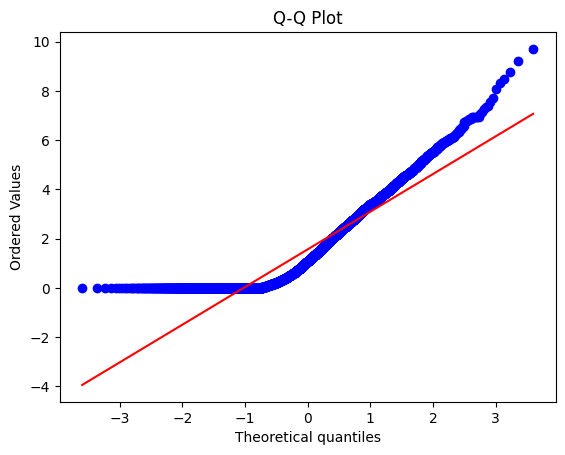

In [199]:


array = groups[1]


import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(array, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

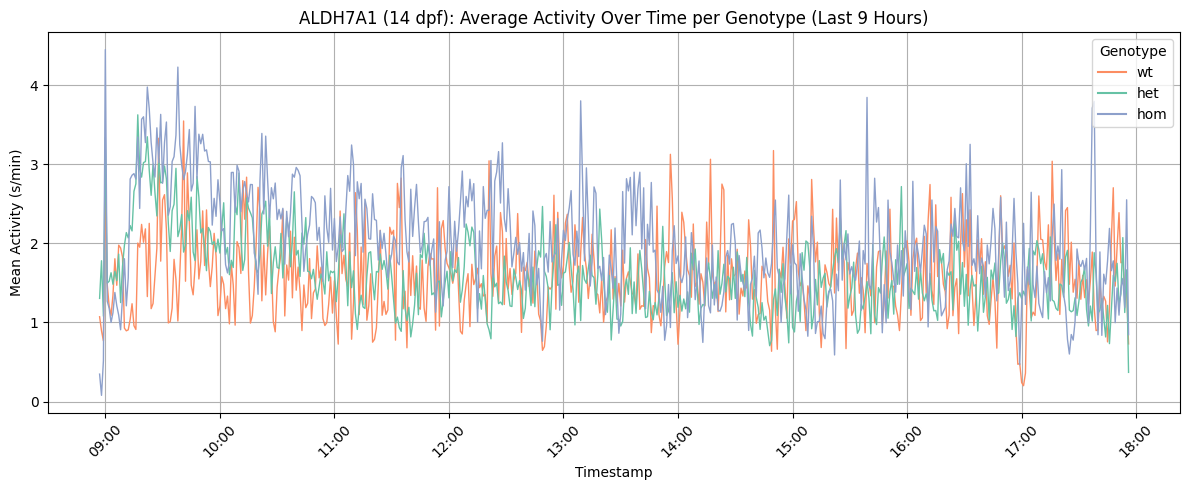

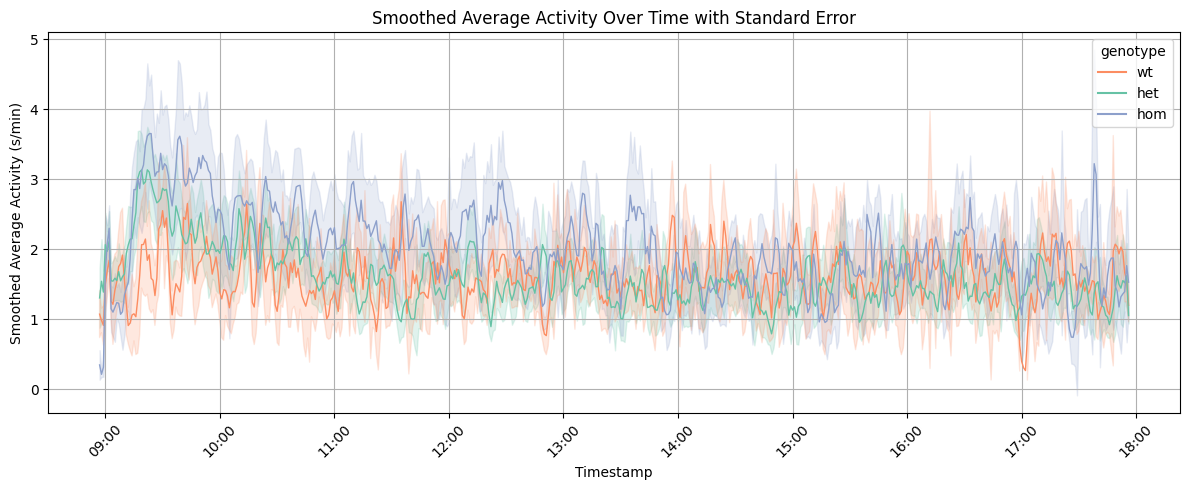

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

grouped_data = last9h_df_groupedby_geno_time_15_zd.reset_index()

# Plot using seaborn
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=grouped_data,
    x='stdate_sttime',  # x-axis: timestamps
    y='mean',           # y-axis: the mean of 'middur'
    hue='genotype',     # Different lines for each genotype
    hue_order = order,
    linewidth=1,
    palette=new_colors_order
)


# Customize the x-axis format
ax = plt.gca()  # Get the current axes
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically locate date ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as 'Date on one line, Time on the next'

# Customize plot
plt.title("ALDH7A1 (14 dpf): Average Activity Over Time per Genotype (Last 9 Hours)")
plt.xlabel("Timestamp")
plt.ylabel("Mean Activity (s/min)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Genotype")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


### Smooth plot

# Apply a rolling average for smoothing
grouped_data['smoothed_mean'] = grouped_data.groupby('genotype')['mean'].apply(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# Calculate Standard Error (SE)
grouped_data['se'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Plot using seaborn
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=grouped_data,
    x='stdate_sttime',  # x-axis: timestamps
    y='smoothed_mean',           # y-axis: the mean of 'middur'
    hue_order=order,
    hue='genotype',     # Different lines for each genotype
    linewidth=1,
    ci=None,
    palette=new_colors_order
)


# Add shaded standard error for each genotype
for genotype, group in grouped_data.groupby('genotype'):
    # print(genotype, group)
    plt.fill_between(
        group['stdate_sttime'],
        group['smoothed_mean'] - group['se'],  # Lower bound (mean - SE)
        group['smoothed_mean'] + group['se'],  # Upper bound (mean + SE)
        color = geno_col_dict[genotype],
        alpha=0.2,                             # Transparency for the shading
        label=f"{genotype} SE"          # Label for the spread
    )

# Customize the x-axis format
ax = plt.gca()  # Get the current axes
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically locate date ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as 'Date on one line, Time on the next'

# Customize plot
plt.title("Smoothed Average Activity Over Time with Standard Error")
plt.xlabel("Timestamp")
plt.ylabel("Smoothed Average Activity (s/min)")
plt.xticks(rotation=45)
# plt.legend(title="Genotype and SE Spread")



plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

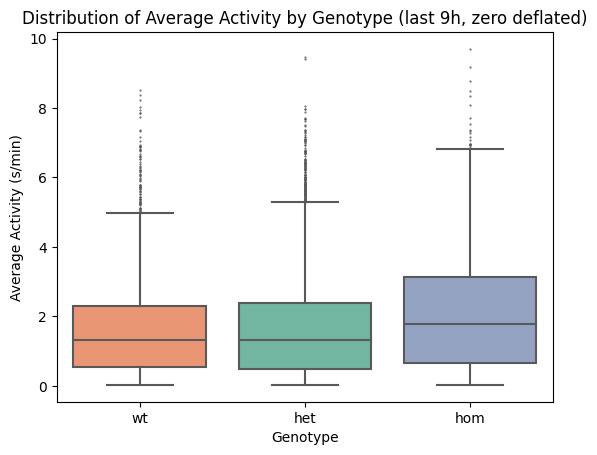

In [183]:
import matplotlib.pyplot as plt


sns.boxplot(data = data,
                   y='middur',
                   x='genotype',
                   palette=new_colors_order,
                   order=['wt','het','hom'],
                   flierprops={"marker": ".", "markersize":"1"}
           )
plt.title('Distribution of Average Activity by Genotype (last 9h)')
plt.suptitle('')  # Remove default title
plt.xlabel('Genotype')
plt.ylabel('Average Activity (s/min)')
plt.show()

In [169]:
zero_deflated = box_15[box_15['middur'] > 0]
zero_deflated.head()

,stdate_sttime,location,animal,start,end,middur,box,plate,well,genotype,time_bin
7,2024-08-27 12:53:02,C103,2-A07,0,60.0,0.043,15,2,A7,wt,0
11,2024-08-27 12:53:02,C105,2-A09,0,60.0,0.043,15,2,A9,het,0
12,2024-08-27 12:53:02,C106,2-A10,0,60.0,10.929,15,2,A10,het,0
14,2024-08-27 12:53:02,C107,2-A11,0,60.0,0.593,15,2,A11,het,0
16,2024-08-27 12:53:02,C108,2-A12,0,60.0,0.043,15,2,A12,hom,0


In [150]:
# Step 1: Filter for box 15 and make a copy to avoid SettingWithCopyWarning
box_15_data = middur_df[middur_df['box'] == '15'].copy()

# Step 2: Add a 'date' column by extracting the date from the timestamp
box_15_data['date'] = pd.to_datetime(box_15_data['stdate_sttime']).dt.date

# Step 3: Identify the last day for box 15
last_day_box_15 = box_15_data['date'].max()

# Step 4: Filter for the last day
last_day_box_15_data = box_15_data[box_15_data['date'] == last_day_box_15]

# Step 5: Recalculate statistics grouped by genotype
genotype_stats_last_day_box_15 = last_day_box_15_data.groupby('genotype')['middur'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Print the recalculated stats
print(genotype_stats_last_day_box_15)

# Step 5 (Optional): Perform ANOVA and t-tests again
from scipy.stats import f_oneway, ttest_ind

# ANOVA for the last day of box 15
groups_last_day_box_15 = [group['middur'].values for _, group in last_day_box_15_data.groupby('genotype')]
anova_result_last_day_box_15 = f_oneway(*groups_last_day_box_15)
print('ANOVA F-statistic (last day, box 15):', anova_result_last_day_box_15.statistic)
print('ANOVA p-value (last day, box 15):', anova_result_last_day_box_15.pvalue)

# Pairwise t-tests for the last day of box 15
genotypes_last_day_box_15 = last_day_box_15_data['genotype'].unique()
for g1, g2 in combinations(genotypes_last_day_box_15, 2):
    group1 = last_day_box_15_data[last_day_box_15_data['genotype'] == g1]['middur']
    group2 = last_day_box_15_data[last_day_box_15_data['genotype'] == g2]['middur']
    ttest_result_last_day_box_15 = ttest_ind(group1, group2)
    print(f'T-test between {g1} and {g2} (last day, box 15): p-value={ttest_result_last_day_box_15.pvalue}')

              mean  median       std  min     max  count
genotype                                                
het       0.802082  0.0000  1.253816  0.0   9.460  20463
hom       1.021901  0.2835  1.426948  0.0   9.708   8616
wt        0.812565  0.0000  1.286076  0.0  10.953  11847
ANOVA F-statistic (last day, box 15): 93.92158817331143
ANOVA p-value (last day, box 15): 2.012345381658023e-41
T-test between het and wt (last day, box 15): p-value=0.473135134830433
T-test between het and hom (last day, box 15): p-value=4.78928772024598e-39
T-test between wt and hom (last day, box 15): p-value=6.0609047980655585e-28


In [152]:
box_15_data.to_csv('box_15_data.csv', sep='\t', index=False)

In [60]:
data_SA      = b6.MiddurData_SA(date, box1, box2, exp, export)
middur_df_SA = data_SA.prepare_raw_data()

Finished.


In [61]:
middur_df_SA

,TIME(SECONDS),NA,FISH1,FISH2,FISH3,FISH4,FISH5,FISH6,FISH7,FISH8,...,FISH186,FISH187,FISH188,FISH189,FISH190,FISH191,FISH192,NA,NA,CLOCK
0,start,end,middur,middur,middur,middur,middur,middur,middur,middur,...,middur,middur,middur,middur,middur,middur,middur,,,
1,0,60.0,0.0,0.0,0.286,0.0,0.0,0.0,0.237,0.043,...,0.0,0.0,0.0,0.0,0.037,0.0,0.037,,,3.883889
2,60,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,3.900556
3,120,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,3.917222
4,180,240.0,0.078,0.0,0.0,0.0,0.0,0.0,0.407,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,3.933889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14700,881940,882000.0,0.0,0.0,0.0,0.0,0.0,1.446,0.045,2.167,...,0.0,0.0,0.0,0.0,0.0,0.28,1.468,,,8.867222
14701,882000,882060.0,0.0,0.0,0.0,0.0,0.0,1.476,0.0,2.31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,8.883889
14702,882060,882120.0,0.27,0.0,0.0,0.0,0.448,1.465,0.0,2.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,8.900556
14703,882120,882180.0,1.321,0.0,0.0,0.0,0.69,2.127,0.0,1.804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,8.917222


In [62]:

geno_table = data_SA.temp_add_genotype()

In [68]:
# Load the fish activity data (df1) and genotype mapping (df2)
activity_df = middur_df_SA  # Replace with your dataframe for FISH1, FISH2, etc.
genotype_df = geno_table  # Replace with your genotype mapping dataframe

# Ensure column names are unique
activity_df.columns = pd.Index(activity_df.columns.map(str))  # Ensure column names are strings

# Step 1: Map genotypes to the columns
genotype_map = {f"FISH{fish_id}": genotype for fish_id, genotype in genotype_df['Genotype'].items()}

# Step 2: Create a row of genotypes for each column
genotype_row = [genotype_map.get(col, 'unknown') if 'FISH' in col else '' for col in activity_df.columns]

# Step 3: Insert the genotype row as a new DataFrame
genotype_row_df = pd.DataFrame([genotype_row], columns=activity_df.columns)

# Step 4: Insert the genotype row as the third row
data_with_genotypes = pd.concat([activity_df.iloc[:1], genotype_row_df, activity_df.iloc[2:]], ignore_index=True)

# Step 5: Save the modified DataFrame
output_path = 'activity_with_genotypes_third_row_no_headers.csv'
# data_with_genotypes.to_csv(output_path, header=False)

# Provide the file path for download
# output_path

data_with_genotypes.head()

,TIME(SECONDS),NA,FISH1,FISH2,FISH3,FISH4,FISH5,FISH6,FISH7,FISH8,...,FISH186,FISH187,FISH188,FISH189,FISH190,FISH191,FISH192,NA,NA,CLOCK
0,start,end,middur,middur,middur,middur,middur,middur,middur,middur,...,middur,middur,middur,middur,middur,middur,middur,,,
1,,,wt,hom,hom,wt,het,het,wt,wt,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,,,
2,60,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,3.900556
3,120,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,3.917222
4,180,240.0,0.078,0.0,0.0,0.0,0.0,0.0,0.407,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,3.933889


In [77]:
# Drop the first row from the DataFrame
# activity_df_edited = data_with_genotypes.drop(index=data_with_genotypes.index[0])
# activity_df_edited.head()

data_with_genotypes_edited.rename(columns={'TIME(SECONDS)':'start', 'NA':'end'}, inplace=True)
data_with_genotypes_edited = data_with_genotypes_edited.iloc[1:]

In [56]:
# Step 1: Map genotypes to fish columns
genotype_map = {f"FISH{fish_id}": genotype for fish_id, genotype in genotype_df['Genotype'].items()}

# Create a dictionary to group columns by genotype
genotype_groups = {genotype: [col for col, g in genotype_map.items() if g == genotype]
                   for genotype in set(genotype_map.values())}

# Step 2: Aggregate activity data by genotype and time
grouped_df = activity_df[['start', 'end']].copy()  # Retain time columns
for genotype, columns in genotype_groups.items():
    grouped_df[genotype] = activity_df[columns].mean(axis=1)  # Calculate mean activity per genotype

# Step 3: Save the new dataframe in time series format
# output_path_time_series = '/mnt/data/genotype_time_series.csv'
# grouped_df.to_csv(output_path_time_series, index=False)

# Provide the file path for download
# output_path_time_series

KeyError: "None of [Index(['start', 'end'], dtype='object')] are in the [columns]"

In [37]:
#Middur output for Sleep Analysis
# Define input variables
# date   = "240827"
# box1   = "14"
# box2   = "15"
# exp    = "ALDH7A1"
# export = False


date   = "241119"
box1   = "14"
box2   = "15"
exp    = "PLPBP"
export = False

data_SA       = b6.MiddurData_SA(date, box1, box2, exp, export)
middur_df_SA  = data_SA.prepare_raw_data()
# geno_table_SA = data_SA.temp_add_genotype() 
# merged_df_SA  = data_SA.temp_merge_geno_with_data(middur_df_SA, geno_table_SA)
# merged_df_SA.head()



Finished.


In [10]:
middur_df_SA.to_csv('241119_00_DATA.txt', sep='\t', index=False)

In [39]:
box14 = middur_df_SA.copy()
box15 = middur_df_SA.copy()


box14.drop(box14.columns[99:193],axis = 1,inplace=True)
box15.drop(box15.columns[2:98],axis = 1,inplace=True)

In [35]:
last3cols = middur_df_SA.copy()
last3cols.drop(middur_df_SA.columns[0:194],axis = 1,inplace=True)

In [43]:
# box14.to_csv('241119_14_DATA.txt', sep='\t', index=False)
box15.to_csv('241119_15_DATA.txt', sep='\t', index=False)

In [54]:
box15_omit_150_162 = box15.copy()
box15_omit_150_162.drop(box15_omit_150_162.columns[55],axis = 1,inplace=True)
box15_omit_150_162.drop(box15_omit_150_162.columns[66],axis = 1,inplace=True)

In [55]:
box15_omit_150_162.columns[50:70]

Index(['FISH145', 'FISH146', 'FISH147', 'FISH148', 'FISH149', 'FISH151',
       'FISH152', 'FISH153', 'FISH154', 'FISH155', 'FISH156', 'FISH157',
       'FISH158', 'FISH159', 'FISH160', 'FISH161', 'FISH163', 'FISH164',
       'FISH165', 'FISH166'],
      dtype='object')

In [56]:
box15_omit_150_162.to_csv('241119_15_DATA.txt', sep='\t', index=False)